In [1]:
from chesslab.agent_tf import agent
from chesslab.agent_stockfish import agent as s_agent
from chesslab.tests import kaufman_test
import chess
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import tensorflow as tf
class Model_1():

    def __init__(self,
                   n_classes=2):
        initializer = tf.keras.initializers.GlorotNormal()
        self.hw=[]
        self.hb=[]

        self.hw.append( tf.Variable(initializer(shape=(7,7,3,32),dtype=np.float32),name="hl1weigths",dtype="float32") )
        self.hb.append( tf.Variable(np.zeros(32,dtype=np.float32),name="hl1bias",dtype="float32") )
        #8x8x32
        self.hw.append( tf.Variable(initializer(shape=(5,5,32,64),dtype=np.float32),name="hl2weigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(64,dtype=np.float32),name="hl2bias",dtype="float32"))
        #8x8x64
        self.hw.append( tf.Variable(initializer(shape=(3,3,64,128),dtype=np.float32),name="hl3weigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(128,dtype=np.float32),name="hl3bias",dtype="float32"))
        #8x8x128
        self.hw.append( tf.Variable(initializer(shape=(8*8*128,256),dtype=np.float32),name="hl4weigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(256,dtype=np.float32),name="hl4bias",dtype="float32"))

        self.hw.append( tf.Variable(initializer(shape=(256, n_classes),dtype=np.float32),name="outweigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(n_classes,dtype=np.float32),name="outbias",dtype="float32"))

        self.trainable_variables = []
        for i in range(len(self.hw)):
            self.trainable_variables.append(self.hw[i])    
            self.trainable_variables.append(self.hb[i])

    def __call__(self,x): 

        # Declarando la arquitectura
        out = tf.cast(x, tf.float32)
        out = tf.reshape(out, shape=[-1, 8, 8, 3])

        layer=0
        out = tf.add(out, 1e-8)
        out = tf.nn.conv2d(out,self.hw[layer], strides=[1,1,1,1], padding='SAME')  
        out = tf.add(out, self.hb[layer])
        out = tf.nn.elu(out)
              #8*8*32
        layer+=1
        out = tf.nn.conv2d(out,self.hw[layer], strides=[1,1,1,1], padding='SAME')  
        out = tf.add(out, self.hb[layer])
        out = tf.nn.elu(out)
              #8*8*64
        layer+=1  
        out = tf.nn.conv2d(out,self.hw[layer], strides=[1,1,1,1], padding='SAME')  
        out = tf.add(out, self.hb[layer])
        out = tf.nn.elu(out)
              #8*8*128
        layer+=1
        out =  tf.reshape(out,[-1, 8*8*128])
        out =  tf.matmul(out,self.hw[layer])
        out = tf.add(out, self.hb[layer])
        out = tf.nn.elu(out)

        layer+=1
        out =  tf.matmul(out,self.hw[layer])
        out = tf.add(out, self.hb[layer])

        return out
model = Model_1()

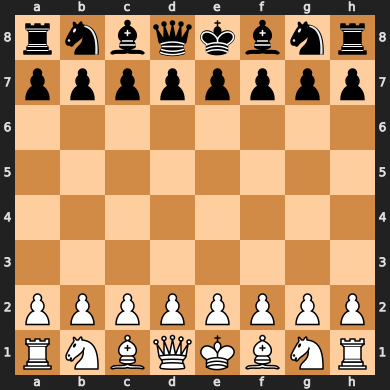

In [3]:
board=chess.Board()
board

In [4]:
base_name = './tmp/tf_weights-full.0.{}.h5'
deepbot = agent(model,base_name.format(1))
move=deepbot.select_move(board)
move

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Move.from_uci('e2e4')

In [5]:
moves,values=deepbot.get_move_values(board)

In [6]:
moves

[Move.from_uci('g1h3'),
 Move.from_uci('g1f3'),
 Move.from_uci('b1c3'),
 Move.from_uci('b1a3'),
 Move.from_uci('h2h3'),
 Move.from_uci('g2g3'),
 Move.from_uci('f2f3'),
 Move.from_uci('e2e3'),
 Move.from_uci('d2d3'),
 Move.from_uci('c2c3'),
 Move.from_uci('b2b3'),
 Move.from_uci('a2a3'),
 Move.from_uci('h2h4'),
 Move.from_uci('g2g4'),
 Move.from_uci('f2f4'),
 Move.from_uci('e2e4'),
 Move.from_uci('d2d4'),
 Move.from_uci('c2c4'),
 Move.from_uci('b2b4'),
 Move.from_uci('a2a4')]

In [7]:
values

array([0.7759785 , 0.79210335, 0.78818643, 0.79187816, 0.7927529 ,
       0.7915331 , 0.7460039 , 0.771091  , 0.7808861 , 0.7717802 ,
       0.7531248 , 0.7807175 , 0.7795936 , 0.78512084, 0.7578838 ,
       0.79770297, 0.79688656, 0.7670595 , 0.7569559 , 0.7788412 ],
      dtype=float32)

In [8]:
from chesslab.utils import join_and_sort
join_and_sort(moves,values)

array([[Move.from_uci('e2e4'), 0.797702968120575],
       [Move.from_uci('d2d4'), 0.7968865633010864],
       [Move.from_uci('h2h3'), 0.7927529215812683],
       [Move.from_uci('g1f3'), 0.7921033501625061],
       [Move.from_uci('b1a3'), 0.7918781638145447],
       [Move.from_uci('g2g3'), 0.7915331125259399],
       [Move.from_uci('b1c3'), 0.7881864309310913],
       [Move.from_uci('g2g4'), 0.7851208448410034],
       [Move.from_uci('d2d3'), 0.7808861136436462],
       [Move.from_uci('a2a3'), 0.7807174921035767],
       [Move.from_uci('h2h4'), 0.7795935869216919],
       [Move.from_uci('a2a4'), 0.7788411974906921],
       [Move.from_uci('g1h3'), 0.7759785056114197],
       [Move.from_uci('c2c3'), 0.7717801928520203],
       [Move.from_uci('e2e3'), 0.7710909843444824],
       [Move.from_uci('c2c4'), 0.7670595049858093],
       [Move.from_uci('f2f4'), 0.7578837871551514],
       [Move.from_uci('b2b4'), 0.7569559216499329],
       [Move.from_uci('b2b3'), 0.7531247735023499],
       [Move.

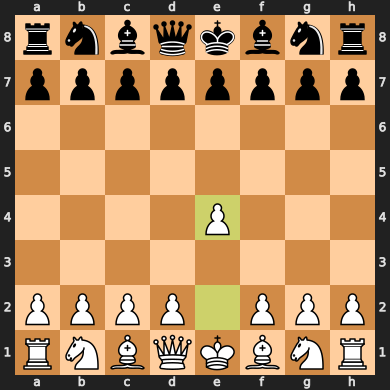

In [9]:
board.push(move)
board

In [10]:
kaufman_test(deepbot)

0.28

In [11]:
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Accuracy: 7/25 = 0.28 | weighted = 0.74
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 21 & 48 & 0.5745 & 0.6317 & c1c7 & 0.8570  \\
02 & f5d4 & 1 & 39 & 1.0000 & 0.7230 & f5d4 & 0.7230  \\
03 & e1d1 & 9 & 38 & 0.7838 & 0.5483 & f2c5 & 0.8961  \\
04 & b1b2 & 1 & 47 & 1.0000 & 0.8408 & b1b2 & 0.8408  \\
05 & g5c1 & 1 & 48 & 1.0000 & 0.6290 & g5c1 & 0.6290  \\
06 & a3a2 & 1 & 31 & 1.0000 & 0.2582 & a3a2 & 0.2582  \\
07 & b7e4 & 11 & 33 & 0.6875 & 0.2321 & f6e4 & 0.3028  \\
08 & h7h6 & 23 & 39 & 0.4211 & 0.0898 & f8f2 & 0.3322  \\
09 & f3e2 & 5 & 35 & 0.8824 & 0.7087 & d2b4 & 0.7578  \\
10 & d5c3 & 3 & 41 & 0.9500 & 0.8132 & c7h2 & 0.8772  \\
11 & g3f5 & 2 & 35 & 0.9706 & 0.8272 & g3h5 & 0.8485  \\
12 & c6d6 & 40 & 41 & 0.0250 & 0.0068 & e7e1 & 0.0279  \\
13 & c3d5 & 25 & 30 & 0.1724 & 0.9627 & f1f6 & 0.9860  \\
14 & b1b2 & 34 & 49 & 0.3125 & 0.8594 & d3g6 & 0.9577  \\
15 & d3f5 & 3 & 51 & 0.9600 & 0.9299 & h6e6 & 0.9494  \\
16 & b3b4 & 3 & 10 & 0.7778 & 0.4698 & e

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.631673,c1c7,0.857023,21,48,0.574468
1,f5d4,0.723004,f5d4,0.723004,1,39,1.000000
2,e1d1,0.548335,f2c5,0.896077,9,38,0.783784
3,b1b2,0.840792,b1b2,0.840792,1,47,1.000000
4,g5c1,0.628959,g5c1,0.628959,1,48,1.000000
5,a3a2,0.258240,a3a2,0.258240,1,31,1.000000
6,b7e4,0.232064,f6e4,0.302764,11,33,0.687500
7,h7h6,0.089829,f8f2,0.332200,23,39,0.421053
8,f3e2,0.708687,d2b4,0.757756,5,35,0.882353
9,d5c3,0.813164,c7h2,0.877201,3,41,0.950000


In [12]:
epochs=35
exact_acc = np.zeros(epochs)
weighted_acc = np.zeros(epochs)
train_acc_model = np.zeros(epochs)
test_acc_model = np.zeros(epochs)
for i in range(1,epochs+1):
    deepbot = agent(model,base_name.format(i))
    acc,acc_w,_  = kaufman_test(deepbot,details=1)
    exact_acc[i-1]=acc
    weighted_acc[i-1]=acc_w
    train_acc_model[i-1] = deepbot.history['train']['acc'][-1]
    test_acc_model[i-1] = deepbot.history['test']['acc'][-1]


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GP

In [13]:
path = 'E:/database/stockfish_14.exe'
stockfish = s_agent(path)
ss,ssp,_  = kaufman_test(stockfish,details=1)
print("Exactitud para función de stockfish usando prueba de Kaufman y prueba de Kaufman ponderada\n {} | {:.2f}".format(ss,ssp))
ss = np.repeat(ss,epochs)
ssp = np.repeat(ssp,epochs)

Exactitud para función de stockfish usando prueba de Kaufman y prueba de Kaufman ponderada
 0.24 | 0.61


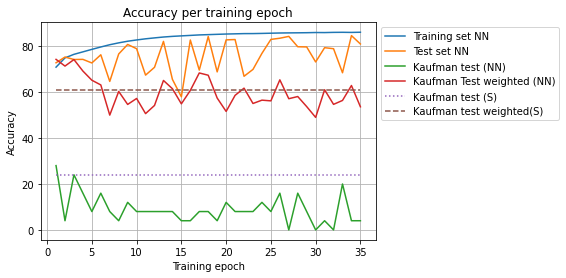

In [14]:
x = np.arange(epochs)+1
plt.plot(x,train_acc_model*100)
plt.plot(x,test_acc_model*100)
plt.plot(x,exact_acc*100)
plt.plot(x,weighted_acc*100)
plt.plot(x,ss*100,linestyle='dotted')
plt.plot(x,ssp*100,linestyle='dashed')
plt.title('Exactitud por epoca de entrenamiento')
plt.xlabel('Epoca de entrenamiento')
plt.ylabel('Exactitud')
plt.legend(['Exactitud entrenamiento','Exactitud prueba','Prueba de kaufman','Prueba de kaufman ponderada','Prueba de kauman Stockfish','Prueba de Kaufman ponderada Stockfish'],bbox_to_anchor=(1, 1),loc=2)
plt.grid()
plt.savefig('grafica.png',bbox_inches="tight")
plt.show()

In [15]:
train_acc_model

array([0.70886701, 0.74917227, 0.76462966, 0.77540439, 0.78624308,
       0.79664695, 0.80646425, 0.81460881, 0.82170582, 0.82723707,
       0.83220559, 0.83624762, 0.84003967, 0.84285438, 0.84501272,
       0.84704936, 0.8491652 , 0.85042435, 0.85176134, 0.85303271,
       0.85392952, 0.85488129, 0.85500556, 0.85572344, 0.85664016,
       0.85754222, 0.85800928, 0.85837942, 0.85883296, 0.85963225,
       0.85938358, 0.86027235, 0.860587  , 0.86009246, 0.86083138])

In [16]:
print('Epoca & Conjunto de & Conjunto & Prueba & Prueba de \\\\')
print(' & entrenamiento & de prueba & de Kaufman & Kaufman ponderada \\\\')
for i in range(epochs):
    print('{:02d} & {:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\'.format(i+1,100*train_acc_model[i],100*test_acc_model[i],100*exact_acc[i],100*weighted_acc[i]))
data = np.stack((train_acc_model,test_acc_model,exact_acc,weighted_acc),axis=1)
pd.DataFrame(data,index=x,columns=["Conjunto de entrenamiento","Conjunto de prueba","Prueba de kaufman","Prueba de kaufman ponderada"])

Epoca & Conjunto de & Conjunto & Prueba & Prueba de \\
 & entrenamiento & de prueba & de Kaufman & Kaufman ponderada \\
01 & 70.89 & 72.78 & 28.00 & 74.27 \\
02 & 74.92 & 75.29 & 4.00 & 71.35 \\
03 & 76.46 & 74.21 & 24.00 & 74.19 \\
04 & 77.54 & 74.27 & 16.00 & 69.18 \\
05 & 78.62 & 72.71 & 8.00 & 65.19 \\
06 & 79.66 & 76.27 & 16.00 & 63.14 \\
07 & 80.65 & 64.67 & 8.00 & 50.00 \\
08 & 81.46 & 76.62 & 4.00 & 60.30 \\
09 & 82.17 & 80.76 & 12.00 & 54.65 \\
10 & 82.72 & 78.92 & 8.00 & 57.25 \\
11 & 83.22 & 67.41 & 8.00 & 50.65 \\
12 & 83.62 & 70.81 & 8.00 & 54.21 \\
13 & 84.00 & 82.10 & 8.00 & 65.09 \\
14 & 84.29 & 65.56 & 8.00 & 61.49 \\
15 & 84.50 & 57.97 & 4.00 & 54.91 \\
16 & 84.70 & 82.70 & 4.00 & 60.74 \\
17 & 84.92 & 69.61 & 8.00 & 68.35 \\
18 & 85.04 & 84.21 & 8.00 & 67.36 \\
19 & 85.18 & 68.82 & 4.00 & 57.43 \\
20 & 85.30 & 82.76 & 12.00 & 51.60 \\
21 & 85.39 & 82.91 & 8.00 & 58.60 \\
22 & 85.49 & 66.90 & 8.00 & 61.73 \\
23 & 85.50 & 69.91 & 8.00 & 55.06 \\
24 & 85.57 & 76.89 & 12

,Conjunto de entrenamiento,Conjunto de prueba,Prueba de kaufman,Prueba de kaufman ponderada
1,0.708867,0.727848,0.28,0.742701
2,0.749172,0.752863,0.04,0.713469
3,0.764630,0.742055,0.24,0.741857
4,0.775404,0.742685,0.16,0.691820
5,0.786243,0.727082,0.08,0.651948
6,0.796647,0.762741,0.16,0.631383
7,0.806464,0.646665,0.08,0.499997
8,0.814609,0.766223,0.04,0.602990
9,0.821706,0.807628,0.12,0.546452
10,0.827237,0.789154,0.08,0.572474
